In [1]:
## imports
import pandas as pd
import numpy as np
import seaborn as sns

## import the plotnine package
## make sure it's installed
## if not installed, can use
## ! pip install plotnine
# import plotnine
# from plotnine import *

import matplotlib.pyplot as plt

# A few plot types

## Load DC crime data

In [85]:
## load data on 2020 crimes in DC
df = dc_crim_2020 = pd.read_csv("https://opendata.arcgis.com/datasets/f516e0dd7b614b088ad781b0c4002331_2.csv")

## Plot type one: bar plot

**Goal**: bar plot where x axis is what shift it is; y axis is the count of unique crime reports (using `OBJECT_ID` as unique indicator)

In [87]:
## step one: create the summary we want to plot
C = count_byshift = pd.DataFrame(df.groupby('SHIFT')['OBJECTID'].nunique()).reset_index()
count_byshift

,SHIFT,OBJECTID
0,DAY,10094
1,EVENING,12324
2,MIDNIGHT,5513


#### Explore the data: Make a simple graph and see if you need it

([<matplotlib.axis.XTick at 0x361727440>,
 [Text(0, 0, 'DAY'), Text(1, 0, 'EVENING'), Text(2, 0, 'MIDNIGHT')])

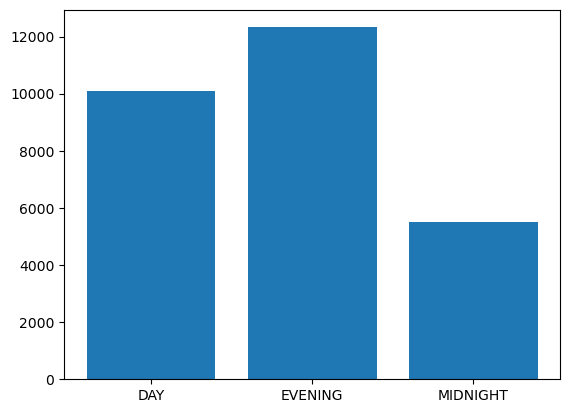

In [91]:
plt.bar(C.index, C.OBJECTID)
plt.xticks(C.index, C.SHIFT)

#### Make the graph look pretty

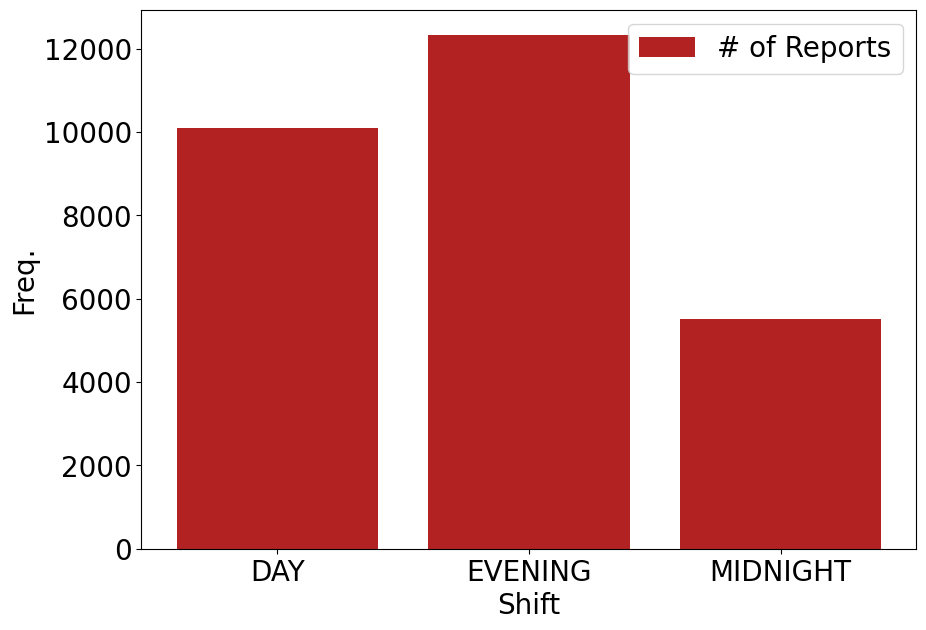

In [95]:
plt.figure(figsize=(10,7)) # Define the size of the graph

plt.bar(C.index, C.OBJECTID, label = "# of Reports", 
        color="firebrick") # Define the figure object

plt.xticks(C.index, C.SHIFT, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Shift", fontsize=20)
plt.ylabel("Freq.", fontsize=20)

plt.legend(fontsize=20)

plt.savefig("barplot.png", bbox_inches="tight")

#### Try it yourself with METHOD
Create a bar chart on the METHOD column.
Named colors: https://matplotlib.org/stable/gallery/color/named_colors.html

In [98]:
## step one: create the summary we want to plot
M = count_byshift = pd.DataFrame(df.groupby('METHOD')['OBJECTID'].nunique()).reset_index()
count_byshift

,METHOD,OBJECTID
0,GUN,2034
1,KNIFE,641
2,OTHERS,25256


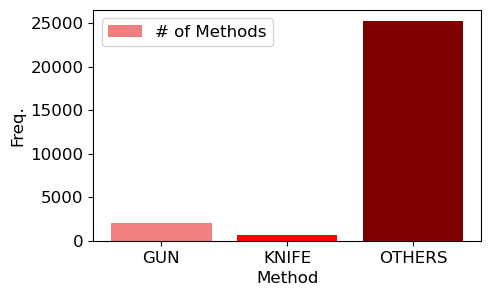

In [124]:
plt.figure(figsize=(5,3)) # Define the size of the graph

plt.bar(M.index, M.OBJECTID, label = "# of Methods", 
        color=["lightcoral","red","maroon"]) # Define the figure object

plt.xticks(M.index, M.METHOD, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Method", fontsize=12)
plt.ylabel("Freq.", fontsize=12)

plt.legend(fontsize=12)

In [ ]:
##other solutions
plt.bar(df.METHOD, df.index, color='cyan')

# Histograms and Densities

(array([  38.,  150.,  292.,  515.,  866.,  776., 1261., 2622., 4521.,
        2440., 2251., 3053., 3071., 1829.,  906.,  789.,  849.,  853.,
         649.,  200.]),
 array([-77.11364471, -77.10346988, -77.09329506, -77.08312024,
        -77.07294541, -77.06277059, -77.05259577, -77.04242094,
        -77.03224612, -77.0220713 , -77.01189647, -77.00172165,
        -76.99154683, -76.981372  , -76.97119718, -76.96102236,
        -76.95084753, -76.94067271, -76.93049789, -76.92032306,
        -76.91014824]),
 <BarContainer object of 20 artists>)

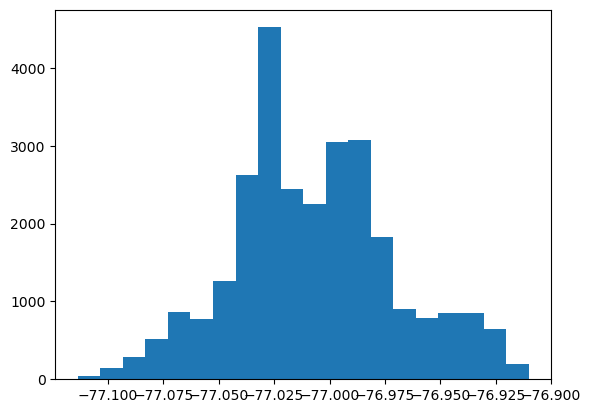

In [29]:
plt.hist( df.X, bins=20 )

<Axes: xlabel='X', ylabel='Density'>

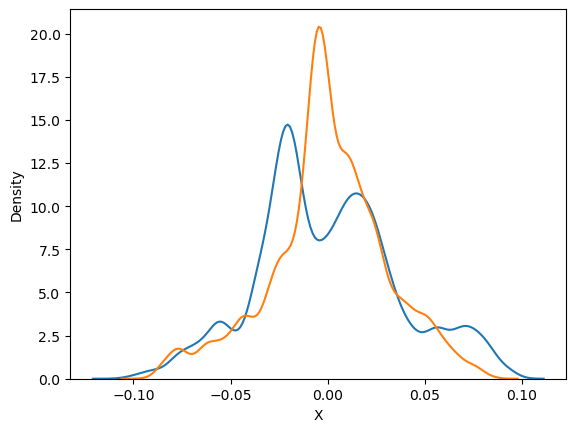

In [31]:
sns.kdeplot( df.X - df.X.mean())
sns.kdeplot( df.Y - df.Y.mean())

#### Your Turn: Add labels (X and Y), plot the legend, and change the color of your density
- What are the differences in distribution you observe?

Text(0, 0.5, 'Y')

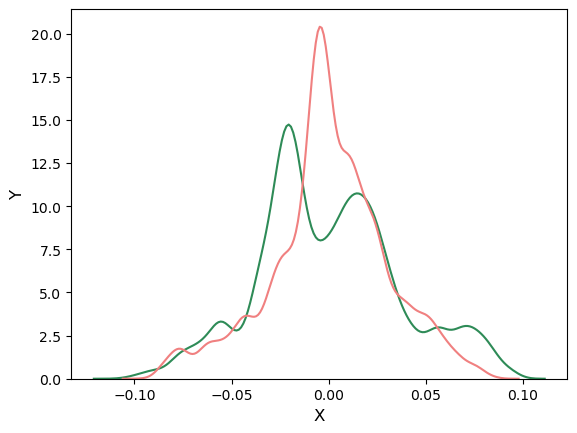

In [37]:
sns.kdeplot( df.X - df.X.mean(), color="seagreen")
sns.kdeplot( df.Y - df.Y.mean(), color="lightcoral")

plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)

## Two dimensional density plots

<Axes: xlabel='X', ylabel='Y'>

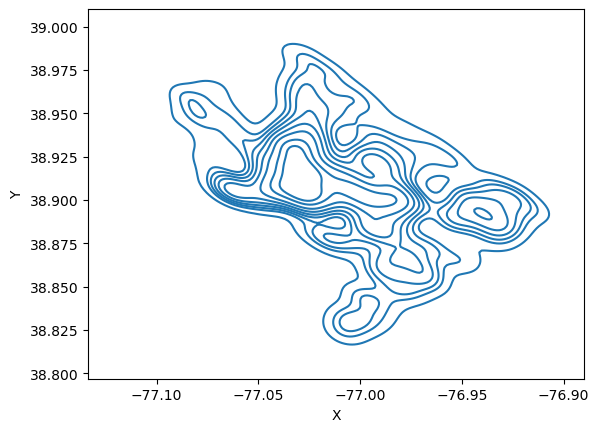

In [46]:
sns.kdeplot(x = df.X, y = df.Y)

#### Your turn: Plot the densities for WARDS 1, 2, and 3

- Sample 100 for each ward.
- Should take six lines of code. Hint: Do it for 1 first.

In [174]:
## step one: create the summary for WARDS 1, 2, and 3
W1 = count_byshift_1 = df[df['WARD'] == 1].groupby('WARD')['OBJECTID'].nunique()
count_byshift_1
W2 = count_byshift_2 = df[df['WARD'] == 2].groupby('WARD')['OBJECTID'].nunique()
count_byshift_2
W3 = count_byshift_3 = df[df['WARD'] == 3].groupby('WARD')['OBJECTID'].nunique()
count_byshift_3

WARD
3    1709
Name: OBJECTID, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


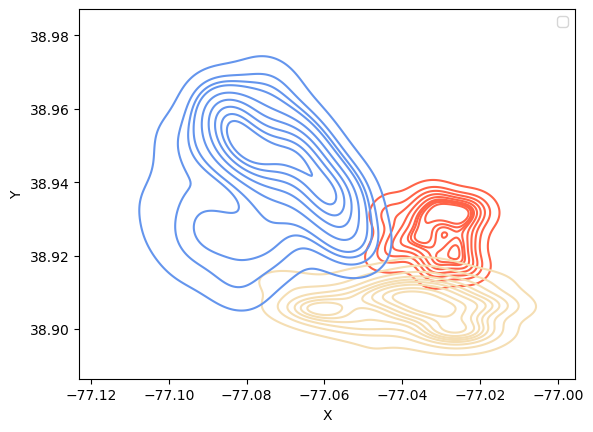

In [170]:
df1 = df[df.WARD == 1].sample(100)
sns.kdeplot(x = df1.X, y = df1.Y, color = "tomato", label = "ward1")
df2 = df[df.WARD == 2].sample(100)
sns.kdeplot(x = df2.X, y = df2.Y, color = "wheat", label = "ward2")
df3 = df[df.WARD == 3].sample(100)
sns.kdeplot(x = df3.X, y = df3.Y, color = "cornflowerblue", label = "ward3")

plt.legend()

# Line Plots
**Goal**: bar plot where x axis is month; y axis is the count of unique crime reports (using `OBJECT_ID` as unique indicator); want line graph to be able to see trends over time in count of reported crimes

In [62]:
df['report_month'] = pd.to_datetime(df.REPORT_DAT).dt.month
df[["REPORT_DAT", "report_month"]].sample(n = 3)

,REPORT_DAT,report_month
26334,2020/06/03 18:15:28+00,6
4725,2020/10/06 15:13:03+00,10
5926,2020/12/14 00:43:31+00,12


In [64]:
df['report_year'] = pd.to_datetime(df.REPORT_DAT).dt.year

In [66]:
### Group by month and find unique reports; same syntax as above

C = count_bymonth = df.groupby('report_month')['OBJECTID'].nunique().reset_index()
C

,report_month,OBJECTID
0,1,2950
1,2,2540
2,3,2202
3,4,1652
4,5,1834
5,6,2276
6,7,2134
7,8,2433
8,9,2570
9,10,2563


In [68]:
##random sample
df.sample(frac=0.1)

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID,report_month,report_year
10371,-77.091618,38.945542,20150879,2020/10/21 21:41:27+00,EVENING,OTHERS,THEFT/OTHER,4600 - 4699 BLOCK OF WINDOM PLACE NW,392058.0,141964.0,...,Precinct 30,38.945534,-77.091615,NaN,2020/10/03 16:00:42+00,2020/10/05 21:00:47+00,595834977,NaN,10,2020
19246,-77.019419,38.912606,20175373,2020/12/10 20:03:46+00,EVENING,GUN,ROBBERY,500 - 599 BLOCK OF R STREET NW,398316.0,138304.0,...,Precinct 18,38.912598,-77.019417,NaN,2020/12/10 17:50:08+00,2020/12/10 18:30:15+00,595988645,NaN,12,2020
1162,-77.047357,38.896023,20004857,2020/01/09 08:34:22+00,MIDNIGHT,OTHERS,THEFT/OTHER,2100 - 2199 BLOCK OF E STREET NW,395892.0,136464.0,...,Precinct 2,38.896015,-77.047355,NaN,2020/01/09 07:39:45+00,2020/01/09 07:42:21+00,595563987,NaN,1,2020
24753,-77.077697,38.937382,20111761,2020/08/05 18:08:56+00,DAY,OTHERS,THEFT F/AUTO,3600 - 3699 BLOCK OF 39TH STREET NW,393264.0,141057.0,...,Precinct 29,38.937374,-77.077695,NaN,2020/08/05 17:21:04+00,NaN,596074364,NaN,8,2020
13950,-77.027968,38.955682,20136566,2020/09/24 20:49:51+00,EVENING,OTHERS,THEFT/OTHER,5401 - 5499 BLOCK OF GEORGIA AVENUE NW,397576.0,143086.0,...,Precinct 56,38.955674,-77.027966,NaN,2020/09/24 19:15:39+00,2020/09/24 19:20:50+00,595850629,NaN,9,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23788,-77.031964,38.912243,20179778,2020/12/20 01:30:06+00,EVENING,OTHERS,THEFT/OTHER,1618 - 1699 BLOCK OF 14TH STREET NW,397228.0,138264.0,...,Precinct 16,38.912235,-77.031962,NaN,2020/12/19 19:19:15+00,NaN,596067810,NaN,12,2020
21417,-77.029717,38.943466,20028487,2020/02/16 12:36:48+00,DAY,OTHERS,MOTOR VEHICLE THEFT,4200 - 4499 BLOCK OF 13TH STREET NW,397424.0,141730.0,...,Precinct 48,38.943459,-77.029715,NaN,2020/02/16 10:00:44+00,2020/02/16 10:30:39+00,596046694,NaN,2,2020
1967,-77.021058,38.955350,20060015,2020/04/17 14:37:49+00,DAY,OTHERS,THEFT F/AUTO,500 - 699 BLOCK OF JEFFERSON STREET NW,398175.0,143049.0,...,Precinct 56,38.955342,-77.021055,NaN,2020/04/17 00:00:16+00,2020/04/17 14:34:21+00,595565135,NaN,4,2020
2477,-77.097971,38.943591,20037726,2020/03/02 21:02:42+00,EVENING,OTHERS,THEFT F/AUTO,4200 - 4246 BLOCK OF FORDHAM ROAD NW,391507.0,141748.0,...,Precinct 9,38.943584,-77.097969,NaN,2020/03/02 17:40:35+00,2020/03/02 18:15:51+00,595566052,NaN,3,2020


(0.0, 4000.0)

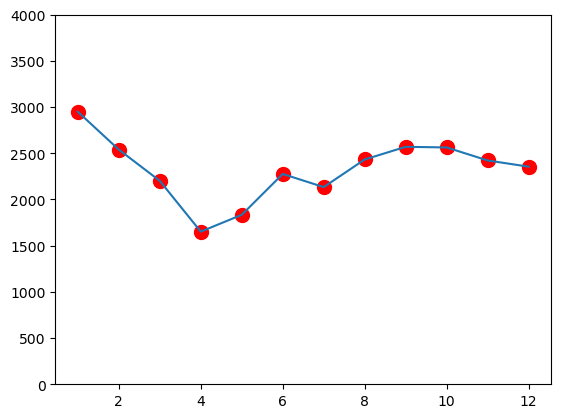

In [70]:
plt.plot(C.report_month, C.OBJECTID)

plt.scatter(C.report_month, C.OBJECTID, 
            s=100, c="red")

plt.ylim(0,4000)

#### Your Turn: Now add the appropriate x and y labels following the same logic as the bar graph

In [178]:
plt.plot(C.report_month, C.OBJECTID)

plt.scatter(C.report_month, C.OBJECTID, 
            s=100, c="red")

plt.ylim(0,4000)

plt.xlabel("Month", fontsize=20)
plt.ylabel("Freq.", fontsize=20)

plt.legend(fontsize=20)

AttributeError: 'DataFrame' object has no attribute 'report_month'

# Read on if you have experience with R & ggplot (and prefer it)
This is here for a quick reference in how to use R-based ggplot in python. 
I almost only use Python, but this is personal preference.

### Other ways to create bars

In [74]:

## one way: plot and display in notebook
(ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) + # base layer with data and x and y axis 
            geom_bar(stat = "identity", fill = "firebrick") + # telling it to expect a bar chart; identity
             # arg just means to use the y value 
            theme_classic() + # aesthetics
            xlab("Which shift?") + # custom label for x axis
            ylab("Count of crimes") + # custom label for y axis
            theme(axis_text = element_text(size = 14, color = "black"))) # make font bigger


NameError: name 'ggplot' is not defined

In [76]:

## another way: save to png- right now,
## it's writing to same path our df is stored in; 
plot_shifts = (ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) +
            geom_bar(stat = "identity", fill = "firebrick") +
            theme_classic() +
            xlab("Which shift?") +
            ylab("Count of crimes") +
            theme(axis_text = element_text(size = 14, color = "black")))
plot_shifts.save("plot_shifts.png", 
                width = 12,
                height = 8,
                verbose = False)


## what happens if we don't specify theme or color of bars? diff aesthetics
## also doesnt give us informative x and y labels (for pset please give 
## informative labels)
(ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) +
            geom_bar(stat = "identity"))

NameError: name 'ggplot' is not defined

## Plot type two: line graph

In [ ]:
## group by month and find unique reports
### first, extract month from report_dat (just 
### with the noncleaned version)

dc_crim_2020['report_month'] = pd.to_datetime(dc_crim_2020.REPORT_DAT,
                                             errors = "coerce").dt.month
### double check this worked
dc_crim_2020[["REPORT_DAT", "report_month"]].sample(n = 3)

### then, group by month and find unique reports; same syntax as above
### just a diff grouping variable 
count_bymonth = pd.DataFrame(dc_crim_2020.groupby('report_month')['OBJECTID'].nunique()).reset_index()
count_bymonth


In [ ]:

### finally, plot result as line graph
### nearly identical syntax to above
### but uses month as the xaxis rather than
### police shift and geom_line()
### rather than geom_bar()
(ggplot(count_bymonth, aes(x = 'report_month', 
            y = 'OBJECTID')) +
            geom_line() +
            ylim(0, 3500) +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            scale_x_continuous(breaks = np.arange(1, 13)))

## Making more complex: adding facets

What if we want to create the above but visualize separately for each ward?

Can group by two variables (see lecture slide) and add a line to facet_wrap

In [ ]:
### add ward as grouping var
count_bymonth_byw = pd.DataFrame(dc_crim_2020.groupby(['report_month',
                                                   'WARD'])['OBJECTID'].nunique()).reset_index()
count_bymonth_byw.head()
count_bymonth_byw.tail()

## make the facetting var prettier 
## by noting "Ward" before the
count_bymonth_byw['WARD_name'] = 'Ward: ' + count_bymonth_byw.WARD.astype(str)

### finally, plot result as line graph
### nearly identical syntax to above
### but uses month as the xaxis rather than
### police shift and geom_line()
### rather than geom_bar()
(ggplot(count_bymonth_byw, aes(x = 'report_month', 
            y = 'OBJECTID')) +
            geom_line(color = "red") +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            facet_wrap('WARD_name', ncol = 2) + # ADDITIONAL LINE 
            scale_x_continuous(breaks = np.arange(1, 13)) +
            theme_538() # using 538 theme 
            ) 

In [ ]:
### rather than geom_bar()
(ggplot(count_bymonth_byw, aes(x = 'report_month', 
            y = 'OBJECTID', group = 'factor(WARD)', color = 'factor(WARD)')) +
            geom_line() +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            scale_x_continuous(breaks = np.arange(1, 13)) +
            theme_538() + # using 538 theme +
             labs(color = "Ward") +
             ylim(0, 700)
            ) 